# Data Collection

In [ ]:
import glob
import psycopg2
import time


conn = psycopg2.connect(
    host="localhost",
    database="citibike_db",
    user="postgres",
    password="postgres"
)
cur = conn.cursor()

csv_files = glob.glob('../data/*.csv')
print(f"Number of files: {len(csv_files)}")

count = 0
for file in csv_files:
    start = time.time()
    print(f"Work on {file}")
    with open(file, 'r') as f:
        next(f)  # jump header

        cur.copy_expert("COPY citibike_trips FROM STDIN WITH (FORMAT CSV)", f)
        conn.commit()
    count += 1
    print(f"{count}/{len(csv_files)} Done. It took {time.time()-start}")

conn.close()

Number of files: 50
Work on data/202405-citibike-tripdata_3.csv
1/50 Done. It took 1.9857008457183838
Work on data/202405-citibike-tripdata_2.csv
2/50 Done. It took 1.9618749618530273
Work on data/202405-citibike-tripdata_1.csv
3/50 Done. It took 1.9396607875823975
Work on data/202405-citibike-tripdata_5.csv
4/50 Done. It took 0.2509498596191406
Work on data/202401-citibike-tripdata_2.csv
5/50 Done. It took 1.748887062072754
Work on data/202412-citibike-tripdata_1.csv
6/50 Done. It took 2.0352110862731934
Work on data/202405-citibike-tripdata_4.csv
7/50 Done. It took 2.0029349327087402
Work on data/202412-citibike-tripdata_3.csv
8/50 Done. It took 0.6308376789093018
Work on data/202401-citibike-tripdata_1.csv
9/50 Done. It took 1.9922542572021484
Work on data/202412-citibike-tripdata_2.csv
10/50 Done. It took 2.3372859954833984
Work on data/202402-citibike-tripdata_1.csv
11/50 Done. It took 2.0544698238372803
Work on data/202411-citibike-tripdata_3.csv
12/50 Done. It took 2.04186511039

# Data Preprocessing

In [ ]:
import pandas as pd


df = pd.read_csv("../data/2024_top3.csv")

/var/folders/p8/xm1_mmt52534xk0_68g3qwrw0000gn/T/ipykernel_50687/2253967772.py:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/2024_top3.csv")


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881843 entries, 0 to 881842
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             881843 non-null  object 
 1   rideable_type       881843 non-null  object 
 2   started_at          881843 non-null  object 
 3   ended_at            881843 non-null  object 
 4   start_station_name  881696 non-null  object 
 5   start_station_id    881696 non-null  object 
 6   end_station_name    881188 non-null  object 
 7   end_station_id      881090 non-null  object 
 8   start_lat           881696 non-null  float64
 9   start_lng           881696 non-null  float64
 10  end_lat             881093 non-null  float64
 11  end_lng             881093 non-null  float64
 12  member_casual       881843 non-null  object 
dtypes: float64(4), object(9)
memory usage: 87.5+ MB


In [10]:
# Check mixed data-type columns
for column in df.columns:
    print(f"{column} dtypes: {df[column].apply(type).unique()}")

ride_id dtypes: [<class 'str'>]
rideable_type dtypes: [<class 'str'>]
started_at dtypes: [<class 'str'>]
ended_at dtypes: [<class 'str'>]
start_station_name dtypes: [<class 'str'> <class 'float'>]
start_station_id dtypes: [<class 'str'> <class 'float'>]
end_station_name dtypes: [<class 'str'> <class 'float'>]
end_station_id dtypes: [<class 'str'> <class 'float'>]
start_lat dtypes: [<class 'float'>]
start_lng dtypes: [<class 'float'>]
end_lat dtypes: [<class 'float'>]
end_lng dtypes: [<class 'float'>]
member_casual dtypes: [<class 'str'>]


In [11]:
for column in ['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id']:
    print(f"{column}: {df[df[column].apply(lambda x: isinstance(x, float))].shape}")

start_station_name: (147, 13)
start_station_id: (488683, 13)
end_station_name: (655, 13)
end_station_id: (227059, 13)


In [20]:
df[df['start_station_name'].apply(lambda x: isinstance(x, float))]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
2207,B585E940ADC0E92E,electric_bike,2024-03-10 13:12:05.895,2024-03-10 13:18:20.949,NaN,NaN,University Pl & E 14 St,5905.14,NaN,NaN,40.734814,-73.992085,member
2460,0C85A69BB26955D3,electric_bike,2024-03-09 11:59:10.926,2024-03-09 12:06:14.038,NaN,NaN,University Pl & E 14 St,5905.14,NaN,NaN,40.734814,-73.992085,member
4267,C3206594386248F5,electric_bike,2024-03-11 18:09:31.262,2024-03-11 18:12:50.064,NaN,NaN,University Pl & E 14 St,5905.14,NaN,NaN,40.734814,-73.992085,member
5356,4A557C098F12A9A6,electric_bike,2024-03-07 18:09:32.787,2024-03-07 18:17:16.453,NaN,NaN,University Pl & E 14 St,5905.14,NaN,NaN,40.734814,-73.992085,member
9989,B607B2A8E3D72082,electric_bike,2024-05-22 18:52:36.338,2024-05-22 19:31:31.928,NaN,NaN,8 Ave & W 31 St,NaN,NaN,NaN,NaN,NaN,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842323,3EAB2129FE2EBA47,electric_bike,2024-10-12 15:20:18.127,2024-10-12 15:30:57.251,NaN,NaN,W 21 St & 6 Ave,6140.05,NaN,NaN,40.741740,-73.994156,member
862282,E2D3992AB6B4C6D6,electric_bike,2024-10-22 15:39:52.424,2024-10-22 15:41:37.255,NaN,NaN,W 21 St & 6 Ave,6140.05,NaN,NaN,40.741740,-73.994156,member
872009,9107DC38A2128488,electric_bike,2024-03-04 08:55:27.899,2024-03-04 09:03:02.663,NaN,NaN,8 Ave & W 31 St,6450.05,NaN,NaN,40.750585,-73.994685,member
874674,85F5A2652AAFB728,electric_bike,2024-03-14 08:03:59.656,2024-03-14 08:08:50.984,NaN,NaN,W 21 St & 6 Ave,6140.05,NaN,NaN,40.741740,-73.994156,member


In [ ]:
# Drop NaN
df = df.dropna(subset=['start_station_name'])

In [22]:
for column in ['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id']:
    print(f"{column}: {df[df[column].apply(lambda x: isinstance(x, float))].shape}")

start_station_name: (0, 13)
start_station_id: (488536, 13)
end_station_name: (655, 13)
end_station_id: (227019, 13)


In [23]:
df[df['end_station_name'].apply(lambda x: isinstance(x, float))]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
27649,D42297B17275F5FE,electric_bike,2024-05-21 22:31:48.425,2024-05-22 00:21:46.409,8 Ave & W 31 St,6450.05,NaN,NaN,40.750585,-73.994685,NaN,NaN,member
27655,B25DB0A085B004CE,electric_bike,2024-05-25 14:32:18.68,2024-05-25 18:27:42.475,8 Ave & W 31 St,6450.05,NaN,NaN,40.750585,-73.994685,NaN,NaN,casual
27679,A577BABFBCBA3268,classic_bike,2024-05-18 16:13:19.377,2024-05-19 17:13:16.389,8 Ave & W 31 St,6450.05,NaN,NaN,40.750585,-73.994685,NaN,NaN,casual
27682,3C21BF048495C387,electric_bike,2024-05-20 21:28:37.376,2024-05-20 22:52:29.686,University Pl & E 14 St,5905.14,NaN,NaN,40.734814,-73.992085,NaN,NaN,member
27690,249A263929ADFB89,electric_bike,2024-05-21 07:38:23.374,2024-05-21 08:50:56.788,W 21 St & 6 Ave,6140.05,NaN,NaN,40.741740,-73.994156,NaN,NaN,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
874280,9EFBB57BFFBCDA05,electric_bike,2024-03-09 13:35:58.113,2024-03-09 14:42:13.708,University Pl & E 14 St,5905.14,NaN,NaN,40.734814,-73.992085,NaN,NaN,casual
874289,B99414E8B5DA01A3,electric_bike,2024-03-04 17:32:27.765,2024-03-04 18:43:06.213,W 21 St & 6 Ave,6140.05,NaN,NaN,40.741740,-73.994156,NaN,NaN,member
874292,C99CBD7ED13DD682,classic_bike,2024-03-11 12:50:56.798,2024-03-12 13:50:51.474,W 21 St & 6 Ave,6140.05,NaN,NaN,40.741740,-73.994156,NaN,NaN,member
874294,448E4DF60286926F,electric_bike,2024-03-04 15:22:00.708,2024-03-04 23:21:44.349,University Pl & E 14 St,5905.14,NaN,NaN,40.734814,-73.992085,NaN,NaN,member


In [24]:
# Drop NAN
df = df.dropna(subset=['end_station_name'])

In [25]:
df[df.isnull().any(axis=1)]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
8192,928E742845EB00AF,electric_bike,2024-05-25 00:01:32.784,2024-05-25 00:46:51.498,8 Ave & W 31 St,6450.05,E 31 St & 3 Ave,NaN,40.750585,-73.994685,NaN,NaN,member
8323,417B2EA4DBBA7ACC,electric_bike,2024-05-20 16:10:46.222,2024-05-20 16:22:28.322,University Pl & E 14 St,5905.14,Allen St & Hester St,NaN,40.734814,-73.992085,NaN,NaN,member
8434,36B3412324198E4F,electric_bike,2024-05-19 17:34:24.52,2024-05-19 18:22:45.941,University Pl & E 14 St,5905.14,Allen St & Hester St,NaN,40.734814,-73.992085,NaN,NaN,member
10067,093AC434B0047753,electric_bike,2024-05-22 16:32:05.856,2024-05-22 18:39:21.909,Lispenard St & Broadway,5391.06,8 Ave & W 31 St,NaN,40.719392,-74.002472,NaN,NaN,member
10096,1111CDB9A61A21E5,electric_bike,2024-05-31 09:08:12.326,2024-05-31 09:16:03.837,E 41 St & Madison Ave (SE corner),6432.10,8 Ave & W 31 St,NaN,40.752049,-73.979635,NaN,NaN,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
770077,1D764DF1BBC5553A,electric_bike,2024-03-11 20:40:26.526,2024-03-11 20:49:24.337,University Pl & E 14 St,5905.14,Ave D & E 8 St,NaN,40.734814,-73.992085,NaN,NaN,member
840402,2C1EF9A02CD1547B,electric_bike,2024-10-03 07:44:24.665,2024-10-03 08:08:27.85,University Pl & E 14 St,5905.14,E 102 St & Park Ave,NaN,40.734814,-73.992085,NaN,NaN,member
852336,77D4B9B803C893F5,electric_bike,2024-10-14 11:05:32.567,2024-10-14 11:10:58.14,University Pl & E 14 St,5905.14,E 14 St & Ave B,NaN,40.734814,-73.992085,NaN,NaN,member
876637,3946EA2DBA734197,electric_bike,2024-03-14 15:29:04.522,2024-03-14 15:39:16.865,N Moore St & Hudson St,5470.02,University Pl & E 14 St,NaN,40.719961,-74.008443,NaN,NaN,member


In [26]:
# Drop all NaN
df = df.dropna()

df[df.isnull().any(axis=1)]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880946 entries, 0 to 881842
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             880946 non-null  object 
 1   rideable_type       880946 non-null  object 
 2   started_at          880946 non-null  object 
 3   ended_at            880946 non-null  object 
 4   start_station_name  880946 non-null  object 
 5   start_station_id    880946 non-null  object 
 6   end_station_name    880946 non-null  object 
 7   end_station_id      880946 non-null  object 
 8   start_lat           880946 non-null  float64
 9   start_lng           880946 non-null  float64
 10  end_lat             880946 non-null  float64
 11  end_lng             880946 non-null  float64
 12  member_casual       880946 non-null  object 
dtypes: float64(4), object(9)
memory usage: 94.1+ MB


In [29]:
df.shape

(880946, 13)

In [37]:
# change to datetime datatype
df['started_at'] = pd.to_datetime(df['started_at'], format='mixed')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='mixed')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880946 entries, 0 to 881842
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             880946 non-null  object        
 1   rideable_type       880946 non-null  object        
 2   started_at          880946 non-null  datetime64[ns]
 3   ended_at            880946 non-null  datetime64[ns]
 4   start_station_name  880946 non-null  object        
 5   start_station_id    880946 non-null  object        
 6   end_station_name    880946 non-null  object        
 7   end_station_id      880946 non-null  object        
 8   start_lat           880946 non-null  float64       
 9   start_lng           880946 non-null  float64       
 10  end_lat             880946 non-null  float64       
 11  end_lng             880946 non-null  float64       
 12  member_casual       880946 non-null  object        
dtypes: datetime64[ns](2), float64(4), 

We can remove `start_station_id`, `end_station_id`, `start_lat`, `start_lng`, `end_lat`, `endlng` because such information is recorded in latitude and longitude.

In [46]:
df = df.drop(columns=['start_station_id', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880946 entries, 0 to 881842
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             880946 non-null  object        
 1   rideable_type       880946 non-null  object        
 2   started_at          880946 non-null  datetime64[ns]
 3   ended_at            880946 non-null  datetime64[ns]
 4   start_station_name  880946 non-null  object        
 5   end_station_name    880946 non-null  object        
 6   member_casual       880946 non-null  object        
dtypes: datetime64[ns](2), object(5)
memory usage: 86.0+ MB


In [49]:
df['ride_id'].nunique() == len(df)

True

Since `ride_id` is unique, we can remove it. Additionally, `member_casual` is not important for our analysis, we will drop.

In [51]:
df = df.drop(columns=['ride_id', 'member_casual'])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880946 entries, 0 to 881842
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       880946 non-null  object        
 1   started_at          880946 non-null  datetime64[ns]
 2   ended_at            880946 non-null  datetime64[ns]
 3   start_station_name  880946 non-null  object        
 4   end_station_name    880946 non-null  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 72.6+ MB


In [ ]:
df.to_csv("../data/2024_top3_cleaned.csv", index=False)

# Exploratory Data Analysis

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df= pd.read_csv("data/2024_top3_cleaned.csv")

df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880946 entries, 0 to 880945
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       880946 non-null  object        
 1   started_at          880946 non-null  datetime64[ns]
 2   ended_at            880946 non-null  datetime64[ns]
 3   start_station_name  880946 non-null  object        
 4   end_station_name    880946 non-null  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 33.6+ MB


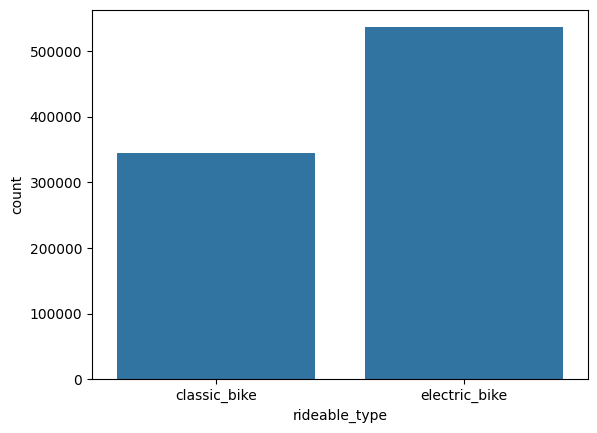

In [74]:
sns.countplot(data=df, x='rideable_type')
plt.show()

In [ ]:
# Calculates the total number of trips starting from each station and sorts them in descending order of trip count
df.groupby('start_station_name').size().reset_index(name='count').sort_values(by='count', ascending=False)

,start_station_name,count
1473,W 21 St & 6 Ave,163308
298,8 Ave & W 31 St,140422
1404,University Pl & E 14 St,139774
1475,W 22 St & 10 Ave,5926
295,8 Ave & W 16 St,5846
...,...,...
1338,St Marks Ave & Rochester Ave,1
454,Bronx Shore Comfort Station,1
190,46 St & 6 Ave,1
458,Brooklyn Ave & Lefferts Ave,1


In [ ]:
# Calculates the total number of trips ending at each station and sorts them in descending order of trip count
df.groupby('end_station_name').size().reset_index(name='count').sort_values(by='count', ascending=False)

,end_station_name,count
1591,W 21 St & 6 Ave,163849
1517,University Pl & E 14 St,142314
319,8 Ave & W 31 St,141704
335,9 Ave & W 22 St,8272
1593,W 22 St & 10 Ave,6599
...,...,...
437,Beverley Rd & E 49 St,1
197,45 Rd & 11 St,1
196,45 Ave & 21 St,1
1201,Midwood St & Utica Ave,1


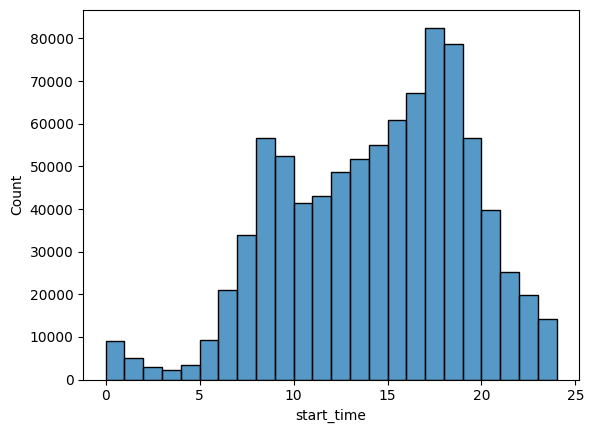

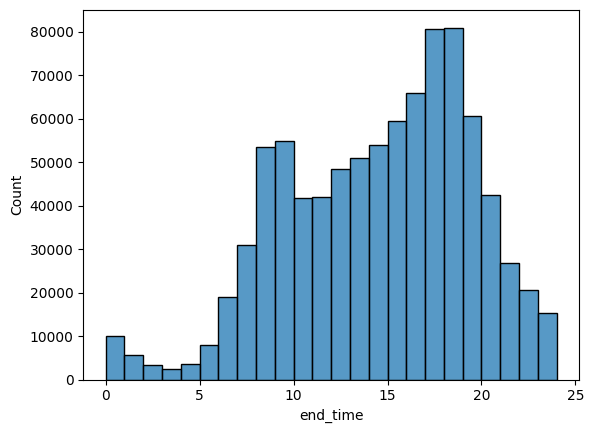

In [77]:
df['start_time'] = df['started_at'].dt.hour + df['started_at'].dt.minute/60 + df['started_at'].dt.second / 3600
df['end_time'] = df['ended_at'].dt.hour + df['ended_at'].dt.minute/60 + df['ended_at'].dt.second / 3600

sns.histplot(x='start_time', data=df, bins=24)
plt.show()

sns.histplot(x='end_time', data=df, bins=24)
plt.show()

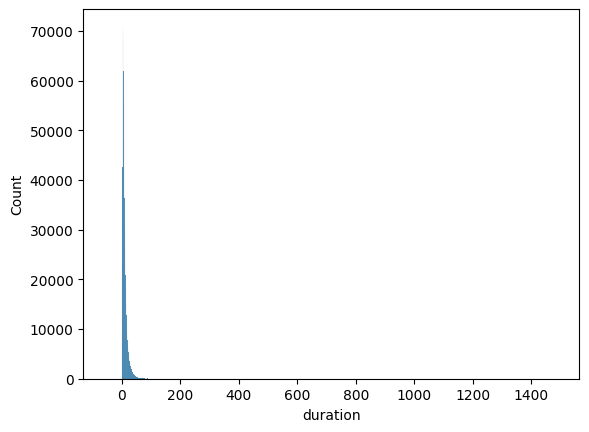

In [78]:
df['duration'] = df['ended_at'] - df['started_at']

df['duration'] = df['duration'].dt.total_seconds() / 60

sns.histplot(x='duration', data=df)
plt.show()


In [79]:
df[np.abs((df['duration']-df['duration'].mean())/df['duration'].std())>2]

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_time,end_time,duration
169,classic_bike,2024-03-03 12:11:21.757,2024-03-03 13:44:08.077,8 Ave & W 31 St,Old Slip & South St,12.189167,13.735556,92.772000
185,classic_bike,2024-03-03 12:02:18.614,2024-03-03 13:33:46.109,8 Ave & W 31 St,Old Slip & South St,12.038333,13.562778,91.458250
431,electric_bike,2024-03-03 11:26:48.289,2024-03-03 12:41:26.341,8 Ave & W 31 St,Great Jones St,11.446667,12.690556,74.634200
551,electric_bike,2024-03-03 11:29:26.444,2024-03-03 12:41:30.499,8 Ave & W 31 St,Great Jones St,11.490556,12.691667,72.067583
825,electric_bike,2024-03-11 15:33:58.745,2024-03-11 16:55:49.455,University Pl & E 14 St,E 10 St & Ave A,15.566111,16.930278,81.845167
...,...,...,...,...,...,...,...,...
880303,electric_bike,2024-03-14 12:27:17.237,2024-03-14 13:19:07.635,W 21 St & 6 Ave,46 St & 28 Ave,12.454722,13.318611,51.839967
880318,electric_bike,2024-03-04 14:22:14.761,2024-03-04 15:17:58.488,University Pl & E 14 St,Grove St & Fresh Pond Rd,14.370556,15.299444,55.728783
880490,classic_bike,2024-03-04 17:36:23.642,2024-03-04 18:56:41.381,8 Ave & W 31 St,8 Ave & W 38 St,17.606389,18.944722,80.295650
880747,electric_bike,2024-03-14 18:10:20.171,2024-03-14 19:04:08.398,8 Ave & W 31 St,Motorgate,18.172222,19.068889,53.803783


In [ ]:
# Drop outliers based on duration

df = df[np.abs((df['duration']-df['duration'].mean())/df['duration'].std())<=2]

In [81]:
df.shape

(871384, 8)

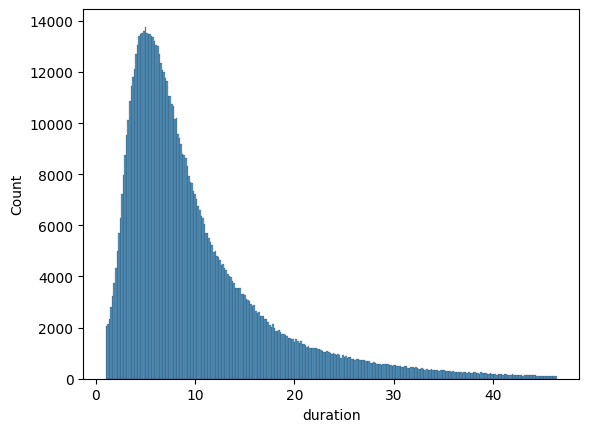

In [82]:
sns.histplot(x='duration', data=df)
plt.show()

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871384 entries, 0 to 880945
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       871384 non-null  object        
 1   started_at          871384 non-null  datetime64[ns]
 2   ended_at            871384 non-null  datetime64[ns]
 3   start_station_name  871384 non-null  object        
 4   end_station_name    871384 non-null  object        
 5   start_time          871384 non-null  float64       
 6   end_time            871384 non-null  float64       
 7   duration            871384 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 59.8+ MB


In [ ]:
df.to_csv("../data/2024_top3_eda.csv", index=False)

## Feature Engineering

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/2024_top3_eda.csv")

df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

df

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_time,end_time,duration
0,classic_bike,2024-03-05 16:22:21.209,2024-03-05 16:27:31.958,W 21 St & 6 Ave,8 Ave & W 27 St,16.372500,16.458611,5.179150
1,classic_bike,2024-03-09 15:20:28.187,2024-03-09 15:35:11.183,W 21 St & 6 Ave,8 Ave & W 27 St,15.341111,15.586389,14.716600
2,electric_bike,2024-03-14 13:18:08.205,2024-03-14 13:24:04.862,W 21 St & 6 Ave,8 Ave & W 27 St,13.302222,13.401111,5.944283
3,electric_bike,2024-03-05 12:28:59.121,2024-03-05 12:33:58.145,W 21 St & 6 Ave,8 Ave & W 27 St,12.483056,12.566111,4.983733
4,electric_bike,2024-03-14 06:29:53.388,2024-03-14 06:32:09.311,W 21 St & 6 Ave,E 17 St & Broadway,6.498056,6.535833,2.265383
...,...,...,...,...,...,...,...,...
871379,classic_bike,2024-03-13 14:53:51.084,2024-03-13 15:00:58.722,W 21 St & 6 Ave,8 Ave & W 27 St,14.897500,15.016111,7.127300
871380,classic_bike,2024-03-10 14:46:09.276,2024-03-10 14:47:51.774,8 Ave & W 31 St,8 Ave & W 27 St,14.769167,14.797500,1.708300
871381,electric_bike,2024-03-01 14:57:35.469,2024-03-01 15:07:35.691,8 Ave & W 31 St,E 17 St & Broadway,14.959722,15.126389,10.003700
871382,electric_bike,2024-03-06 08:16:14.629,2024-03-06 08:36:22.402,8 Ave & W 31 St,E 72 St & York Ave,8.270556,8.606111,20.129550


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871384 entries, 0 to 871383
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       871384 non-null  object        
 1   started_at          871384 non-null  datetime64[ns]
 2   ended_at            871384 non-null  datetime64[ns]
 3   start_station_name  871384 non-null  object        
 4   end_station_name    871384 non-null  object        
 5   start_time          871384 non-null  float64       
 6   end_time            871384 non-null  float64       
 7   duration            871384 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 53.2+ MB


In [25]:
top3_stations = df.groupby('start_station_name').size().reset_index(name='count').sort_values(by='count', ascending=False)['start_station_name'].head(3).tolist()

In [26]:
# Outflow (-1) / Inflow (+1)
outflow = df[df['start_station_name'].isin(top3_stations)].copy()
outflow = outflow[['started_at', 'start_station_name', 'rideable_type']]
outflow.columns = ['time', 'station', 'rideable_type']
outflow['flow'] = -1

inflow = df[df['end_station_name'].isin(top3_stations)].copy()
inflow = inflow[['ended_at', 'end_station_name', 'rideable_type']]
inflow.columns = ['time', 'station', 'rideable_type']
inflow['flow'] = 1

combined = pd.concat([outflow, inflow])

# Resampling (15 mins)
net_flow_df = combined.groupby([
    pd.Grouper(key='time', freq='15min'),
    'station',
    'rideable_type'
])['flow'].sum().unstack(['station', 'rideable_type'], fill_value=0)

# Reindexing to fill every 15 min
start_date = net_flow_df.index.min().floor('D')
end_date = net_flow_df.index.max().ceil('D')

full_time_idx = pd.date_range(start=start_date, end=end_date, freq='15min', inclusive='left') 
net_flow_df = net_flow_df.reindex(full_time_idx, fill_value=0)


# Initial stock: Restore at every 00:00
initial_stock = 10
daily_cumsum = net_flow_df.groupby(pd.Grouper(freq='D')).cumsum()

stock_df = initial_stock + daily_cumsum

stock_df.head()

station             University Pl & E 14 St W 21 St & 6 Ave 8 Ave & W 31 St  \
rideable_type                 electric_bike    classic_bike    classic_bike   
2023-12-31 00:00:00                      10              10              10   
2023-12-31 00:15:00                      10              10              10   
2023-12-31 00:30:00                      10              10              10   
2023-12-31 00:45:00                      10              10              10   
2023-12-31 01:00:00                      10              10              10   

station                           W 21 St & 6 Ave University Pl & E 14 St  
rideable_type       electric_bike   electric_bike            classic_bike  
2023-12-31 00:00:00            10              10                      10  
2023-12-31 00:15:00            10              10                      10  
2023-12-31 00:30:00            10              10                      10  
2023-12-31 00:45:00            10              10                      10  
2023-12-31 01:00:00            10              10                      10

In [27]:
stock_df.shape, 365*24*4

((35232, 6), 35040)

In [28]:
stock_df['8 Ave & W 31 St']['classic_bike'][96:]

2024-01-01 00:00:00    10
2024-01-01 00:15:00    11
2024-01-01 00:30:00    11
2024-01-01 00:45:00    10
2024-01-01 01:00:00    10
                       ..
2024-12-31 22:45:00    18
2024-12-31 23:00:00    18
2024-12-31 23:15:00    17
2024-12-31 23:30:00    17
2024-12-31 23:45:00    17
Freq: 15min, Name: classic_bike, Length: 35136, dtype: int64

In [29]:
# How many days in 2024?
35136/24/4

366.0

In [30]:
stock_df = stock_df.iloc[96:]
stock_df

station             University Pl & E 14 St W 21 St & 6 Ave 8 Ave & W 31 St  \
rideable_type                 electric_bike    classic_bike    classic_bike   
2024-01-01 00:00:00                      10              10              10   
2024-01-01 00:15:00                       9              10              11   
2024-01-01 00:30:00                      10               9              11   
2024-01-01 00:45:00                      10               9              10   
2024-01-01 01:00:00                       9               9              10   
...                                     ...             ...             ...   
2024-12-31 22:45:00                      12               9              18   
2024-12-31 23:00:00                      14               9              18   
2024-12-31 23:15:00                      14               9              17   
2024-12-31 23:30:00                      13               9              17   
2024-12-31 23:45:00                      14               9              17   

station                           W 21 St & 6 Ave University Pl & E 14 St  
rideable_type       electric_bike   electric_bike            classic_bike  
2024-01-01 00:00:00            10              10                      10  
2024-01-01 00:15:00             9              12                      10  
2024-01-01 00:30:00             8              12                      10  
2024-01-01 00:45:00             7              14                      10  
2024-01-01 01:00:00             7              15                      10  
...                           ...             ...                     ...  
2024-12-31 22:45:00            20              21                      19  
2024-12-31 23:00:00            19              21                      19  
2024-12-31 23:15:00            19              20                      18  
2024-12-31 23:30:00            19              22                      18  
2024-12-31 23:45:00            20              23                      18  

[35136 rows x 6 columns]

In [31]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35136 entries, 2024-01-01 00:00:00 to 2024-12-31 23:45:00
Freq: 15min
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   (University Pl & E 14 St, electric_bike)  35136 non-null  int64
 1   (W 21 St & 6 Ave, classic_bike)           35136 non-null  int64
 2   (8 Ave & W 31 St, classic_bike)           35136 non-null  int64
 3   (8 Ave & W 31 St, electric_bike)          35136 non-null  int64
 4   (W 21 St & 6 Ave, electric_bike)          35136 non-null  int64
 5   (University Pl & E 14 St, classic_bike)   35136 non-null  int64
dtypes: int64(6)
memory usage: 1.9 MB


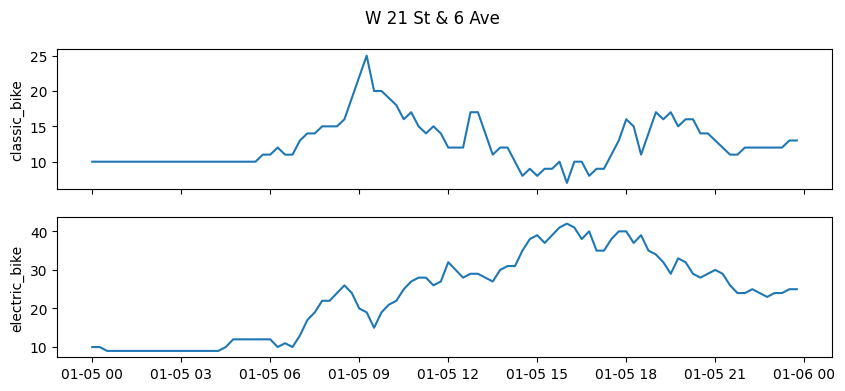

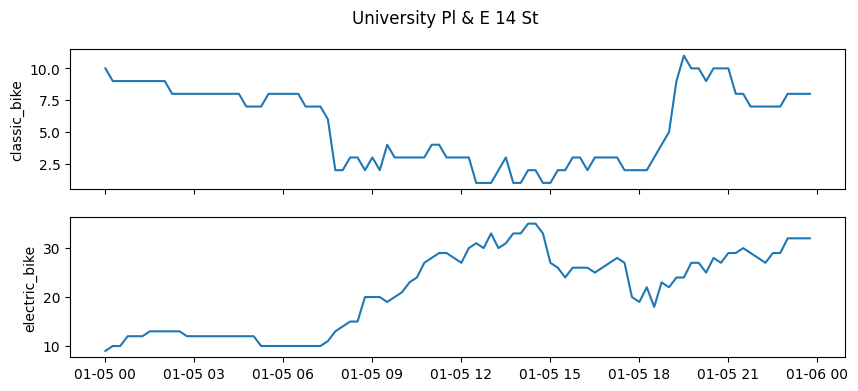

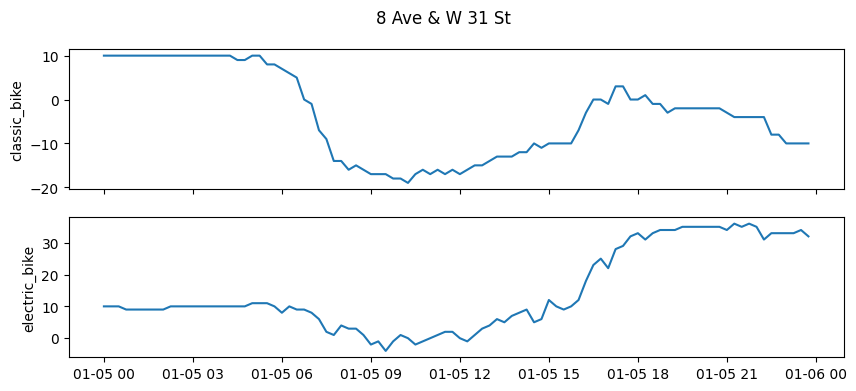

In [32]:
def figure_daily(date, station):

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 4))
    
    fig.suptitle(f"{station}")

    sns.lineplot(stock_df.loc[date,(station,'classic_bike')], ax=ax[0])
    ax[0].set_ylabel("classic_bike")
    ax[0].set_xticklabels([])
    ax[0].set_xlabel("")
    # ax[0].xticks(rotation=45, ha='right')


    sns.lineplot(stock_df.loc[date,(station,'electric_bike')], ax=ax[1])
    ax[1].set_ylabel("electric_bike")
    # ax[1].set_xticklabels(rotation=45, ha='right')

    plt.show()

for station in top3_stations:
    figure_daily('2024-01-05', station)


In [34]:
stock_df.to_csv("../data/2024_top3_timeseries.csv", index=True)

Let us change the multi-index dataframe to long dataframe for efficient feature engineering

In [35]:
long_df = stock_df.stack(level=[0, 1], future_stack=True).reset_index()
long_df.columns = ['time', 'station', 'rideable_type', 'stock']

long_df

,time,station,rideable_type,stock
0,2024-01-01 00:00:00,University Pl & E 14 St,electric_bike,10
1,2024-01-01 00:00:00,W 21 St & 6 Ave,classic_bike,10
2,2024-01-01 00:00:00,8 Ave & W 31 St,classic_bike,10
3,2024-01-01 00:00:00,8 Ave & W 31 St,electric_bike,10
4,2024-01-01 00:00:00,W 21 St & 6 Ave,electric_bike,10
...,...,...,...,...
210811,2024-12-31 23:45:00,W 21 St & 6 Ave,classic_bike,9
210812,2024-12-31 23:45:00,8 Ave & W 31 St,classic_bike,17
210813,2024-12-31 23:45:00,8 Ave & W 31 St,electric_bike,20
210814,2024-12-31 23:45:00,W 21 St & 6 Ave,electric_bike,23


In [36]:
long_df['hour']=long_df['time'].dt.hour
long_df['dayofweek']=long_df['time'].dt.dayofweek

long_df['is_rush_hour'] = long_df['hour'].apply(lambda x: 1 if x in [8, 9, 18, 19] else 0)

grouper = long_df.groupby(['station', 'rideable_type'])['stock']

long_df['lag_1h_stock'] = grouper.shift(4)
long_df['lag_24h_stock'] = grouper.shift(96)

long_df['target_next_stock'] = grouper.shift(-1)

final_df = long_df.dropna().copy()

final_df

,time,station,rideable_type,stock,hour,dayofweek,is_rush_hour,lag_1h_stock,lag_24h_stock,target_next_stock
576,2024-01-02 00:00:00,University Pl & E 14 St,electric_bike,9,0,1,0,28.0,10.0,9.0
577,2024-01-02 00:00:00,W 21 St & 6 Ave,classic_bike,10,0,1,0,24.0,10.0,10.0
578,2024-01-02 00:00:00,8 Ave & W 31 St,classic_bike,9,0,1,0,6.0,10.0,9.0
579,2024-01-02 00:00:00,8 Ave & W 31 St,electric_bike,10,0,1,0,-19.0,10.0,10.0
580,2024-01-02 00:00:00,W 21 St & 6 Ave,electric_bike,10,0,1,0,11.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...
210805,2024-12-31 23:30:00,W 21 St & 6 Ave,classic_bike,9,23,1,0,9.0,6.0,9.0
210806,2024-12-31 23:30:00,8 Ave & W 31 St,classic_bike,17,23,1,0,18.0,22.0,17.0
210807,2024-12-31 23:30:00,8 Ave & W 31 St,electric_bike,19,23,1,0,20.0,0.0,20.0
210808,2024-12-31 23:30:00,W 21 St & 6 Ave,electric_bike,22,23,1,0,21.0,13.0,23.0


In [37]:
final_df['time_numerical'] = (final_df['time'] - pd.to_datetime("2024-01-01 00:00:00")).dt.total_seconds()/3600

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(final_df[['time_numerical']])

final_df['time_numerical'] = scaled_values

In [39]:
final_df.to_csv("../data/2024_top3_fe.csv", index=False)

# Modeling

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_ts = pd.read_csv("../data/2024_top3_timeseries.csv", index_col=0, header=[0, 1], parse_dates=True)

df = pd.read_csv("../data/2024_top3_fe.csv")

df['station'] = df['station'].astype('category')
df['rideable_type'] = df['rideable_type'].astype('category')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210234 entries, 0 to 210233
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   time               210234 non-null  object  
 1   station            210234 non-null  category
 2   rideable_type      210234 non-null  category
 3   stock              210234 non-null  int64   
 4   hour               210234 non-null  int64   
 5   dayofweek          210234 non-null  int64   
 6   is_rush_hour       210234 non-null  int64   
 7   lag_1h_stock       210234 non-null  float64 
 8   lag_24h_stock      210234 non-null  float64 
 9   target_next_stock  210234 non-null  float64 
 10  time_numerical     210234 non-null  float64 
dtypes: category(2), float64(4), int64(4), object(1)
memory usage: 14.8+ MB


In [42]:
import torch
import random
import os

# Random seed setting (Reproducibility)
def seed_everything(seed: int = 42):
    # 1. Python seed
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed) # Hash based calculation (Ex: Dictionary) 
    
    # 2. Numpy seed
    np.random.seed(seed)
    
    # 3. PyTorch CPU
    torch.manual_seed(seed)

    # 4. PyTorch GPU
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed) # Multi-GPU
        
        # CuDNN deterministic option
        # It might reduce performance
        torch.backends.cudnn.deterministic = True 
        # Turn off searching optimal algorithms based on hardware
        torch.backends.cudnn.benchmark = False 

    print(f"Global Seed set to {seed}")

## VAR

In [43]:
df_ts

station             University Pl & E 14 St W 21 St & 6 Ave 8 Ave & W 31 St  \
rideable_type                 electric_bike    classic_bike    classic_bike   
2024-01-01 00:00:00                      10              10              10   
2024-01-01 00:15:00                       9              10              11   
2024-01-01 00:30:00                      10               9              11   
2024-01-01 00:45:00                      10               9              10   
2024-01-01 01:00:00                       9               9              10   
...                                     ...             ...             ...   
2024-12-31 22:45:00                      12               9              18   
2024-12-31 23:00:00                      14               9              18   
2024-12-31 23:15:00                      14               9              17   
2024-12-31 23:30:00                      13               9              17   
2024-12-31 23:45:00                      14               9              17   

station                           W 21 St & 6 Ave University Pl & E 14 St  
rideable_type       electric_bike   electric_bike            classic_bike  
2024-01-01 00:00:00            10              10                      10  
2024-01-01 00:15:00             9              12                      10  
2024-01-01 00:30:00             8              12                      10  
2024-01-01 00:45:00             7              14                      10  
2024-01-01 01:00:00             7              15                      10  
...                           ...             ...                     ...  
2024-12-31 22:45:00            20              21                      19  
2024-12-31 23:00:00            19              21                      19  
2024-12-31 23:15:00            19              20                      18  
2024-12-31 23:30:00            19              22                      18  
2024-12-31 23:45:00            20              23                      18  

[35136 rows x 6 columns]

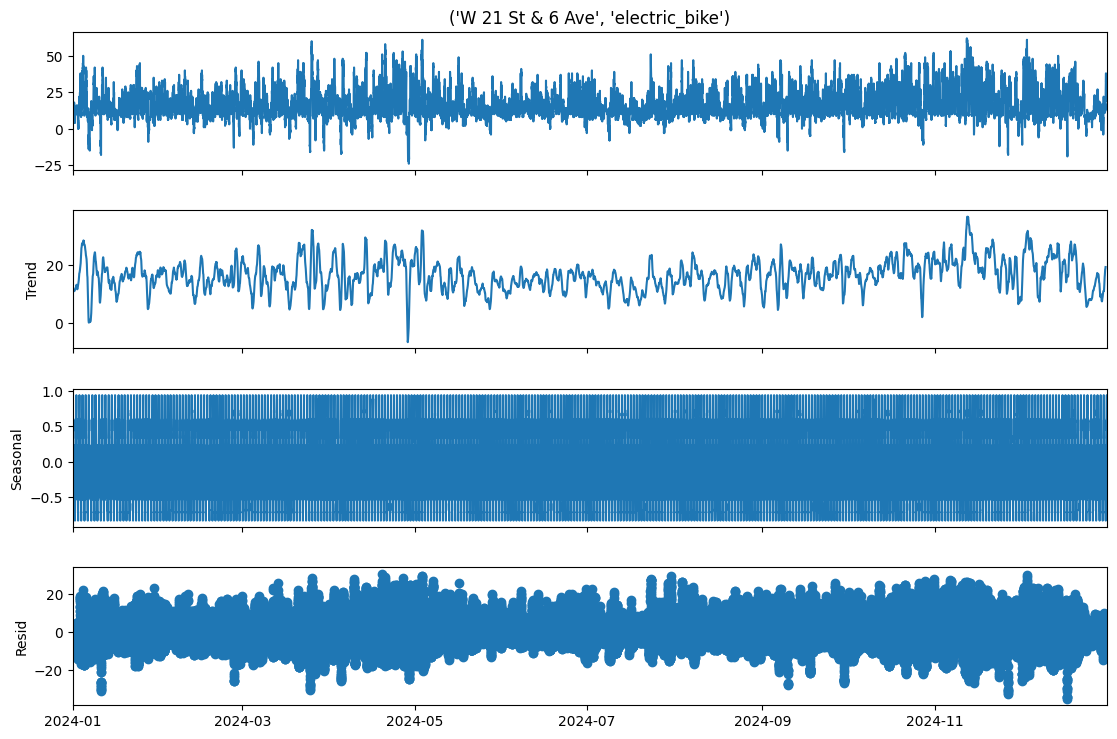

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

target_series = df_ts.loc[:, ('W 21 St & 6 Ave', 'electric_bike')]

decomposition = seasonal_decompose(target_series, model='additive', period=96)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

Train data shape: (28108, 6)
Test data shape: (7028, 6)
Optimal Lag Order: 16
Total Average RMSE: 20.1269

RMSE by Station & Type:
('University Pl & E 14 St', 'electric_bike'): 14.6997
('W 21 St & 6 Ave', 'classic_bike'): 13.3599
('8 Ave & W 31 St', 'classic_bike'): 16.9998
('8 Ave & W 31 St', 'electric_bike'): 37.9916
('W 21 St & 6 Ave', 'electric_bike'): 12.5241
('University Pl & E 14 St', 'classic_bike'): 12.1157


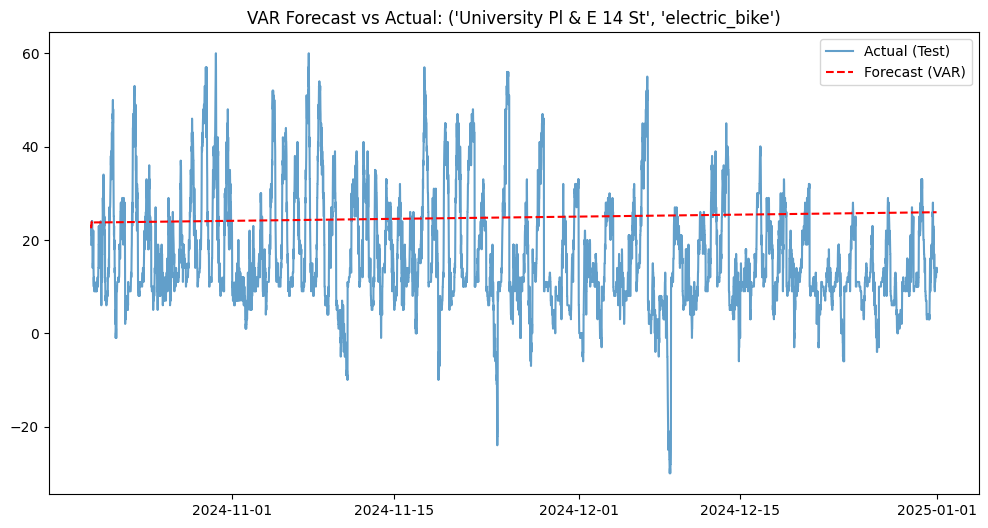

In [45]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Train / Test Split (8:2)
n_obs = len(stock_df)
split_point = int(n_obs * 0.8)

train_df = stock_df.iloc[:split_point]
test_df = stock_df.iloc[split_point:]

print(f"Train data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

# Differencing
train_diff = train_df.diff().dropna()

# Train
model = VAR(train_diff)

# Find the best lag based on AIC
lags_result = model.select_order(maxlags=16)
optimal_lag = lags_result.aic 
print(f"Optimal Lag Order: {optimal_lag}")

var_result = model.fit(optimal_lag)

# Forecasting diff
# It requires the last part of the train data (Lag)
lag_order = var_result.k_ar
forecast_input = train_diff.values[-lag_order:]

fc_diff = var_result.forecast(y=forecast_input, steps=len(test_df))
fc_diff_df = pd.DataFrame(fc_diff, index=test_df.index, columns=test_df.columns)

# Inverting diff to stock
last_stock_train = train_df.iloc[-1]
forecast_stock_df = last_stock_train + fc_diff_df.cumsum()

# Overall RMSE
total_rmse = np.sqrt(mean_squared_error(test_df, forecast_stock_df))
print(f"Total Average RMSE: {total_rmse:.4f}\n")

# RMSE for each station
print("RMSE by Station & Type:")
for col in test_df.columns:
    col_rmse = np.sqrt(mean_squared_error(test_df[col], forecast_stock_df[col]))
    print(f"{col}: {col_rmse:.4f}")

# Visualization
target_col = test_df.columns[0]
plt.figure(figsize=(12, 6))
plt.plot(test_df.index, test_df[target_col], label='Actual (Test)', alpha=0.7)
plt.plot(forecast_stock_df.index, forecast_stock_df[target_col], label='Forecast (VAR)', color='red', linestyle='--')
plt.title(f"VAR Forecast vs Actual: {target_col}")
plt.legend()
plt.show()

## XGBoost

In [46]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint, uniform, loguniform

features = [col for col in df.columns if col!='target_next_stock' and col!='time']

X = df[features]
y = df['target_next_stock']

split_idx = int(len(X)*0.8)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]


model = xgb.XGBRegressor(random_state=42, enable_categorical=True, n_estimators=150, max_depth=20, learning_rate=1e-1)

model.fit(X_train, y_train)

preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print(f"XGBoost RMSE: {rmse:.4f}")

XGBoost RMSE: 3.0741


In [15]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint, uniform, loguniform

features = [col for col in df.columns if col!='target_next_stock' and col!='time']

X = df[features]
y = df['target_next_stock']

split_idx = int(len(X)*0.8)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]


param_dist = {
    'n_estimators': randint(5, 300),
    'max_depth': randint(3, 20),
    'learning_rate': uniform(1e-3, 1)
}

seed_everything(42)

model = xgb.XGBRegressor(random_state=42, enable_categorical=True)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=30,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=4,
    verbose=1
)

random_search.fit(X_train, y_train)

model_xgb = random_search.best_estimator_

print(f"best parameters: {random_search.best_params_}")

#model_xgb = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
#model_xgb.fit(X_train, y_train)


preds = model_xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print(f"XGBoost RMSE: {rmse:.4f}")

xgb.plot_importance(model_xgb)


Global Seed set to 42
Fitting 5 folds for each of 30 candidates, totalling 150 fits


KeyboardInterrupt: 

## LSTM

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# GPU/MPS(Mac)
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

Using device: mps


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210234 entries, 0 to 210233
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   time               210234 non-null  object  
 1   station            210234 non-null  category
 2   rideable_type      210234 non-null  category
 3   stock              210234 non-null  int64   
 4   hour               210234 non-null  int64   
 5   dayofweek          210234 non-null  int64   
 6   is_rush_hour       210234 non-null  int64   
 7   lag_1h_stock       210234 non-null  float64 
 8   lag_24h_stock      210234 non-null  float64 
 9   target_next_stock  210234 non-null  float64 
 10  time_numerical     210234 non-null  float64 
dtypes: category(2), float64(4), int64(4), object(1)
memory usage: 14.8+ MB


In [24]:
from sklearn.preprocessing import MinMaxScaler

df_onehot = pd.get_dummies(df, columns=['station', 'rideable_type'])

# lag features are not needed for LSTM
features = [col for col in df_onehot if col!='target_next_stock' and col!='time']
target = 'target_next_stock'

X = df_onehot[features].to_numpy()
y = df_onehot[target].to_numpy().reshape(-1, 1)


scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

scaled_X = scaler_X.fit_transform(X)
scaled_y = scaler_y.fit_transform(y)

# How long will it lookback? (24 hours)
LOOKBACK_WINDOW = 24*4

def create_sequences(X_data, y_data, lookback):
    X_seq, y_seq = [], []
    # Need to leave a space equal to the lookback window before the end of the data
    for i in range(len(X_data) - lookback):
        # Group the data from i up to just before i+lookback into one chunk (the past 24 hours)
        X_seq.append(X_data[i:i+lookback])
        # The target value at the i+lookback time point (the future time point to predict)
        y_seq.append(y_data[i+lookback])
    return np.array(X_seq), np.array(y_seq)

# 3D tensor
X_lstm, y_lstm = create_sequences(scaled_X, scaled_y, LOOKBACK_WINDOW)

X_lstm = X_lstm.astype(np.float32)
y_lstm = y_lstm.astype(np.float32)

# Check the shape
# Result example: (Number of samples, 24 (hours), 8 (number of features))
print(f"LSTM Input Shape: {X_lstm.shape}")
print(f"LSTM Target Shape: {y_lstm.shape}")




split_idx = int(len(X_lstm) * 0.8)

X_train_lstm, X_test_lstm = X_lstm[:split_idx], X_lstm[split_idx:]
y_train_lstm, y_test_lstm = y_lstm[:split_idx], y_lstm[split_idx:]

print(f"Train shape: {X_train_lstm.shape}, Test shape: {X_test_lstm.shape}")

seed_everything(42)

# 1. numpy to torch.tensor
# (Samples, TimeSteps, Features)
X_train_tensor = torch.from_numpy(X_train_lstm).to(device)
y_train_tensor = torch.from_numpy(y_train_lstm).to(device)
X_test_tensor = torch.from_numpy(X_test_lstm).to(device)
y_test_tensor = torch.from_numpy(y_test_lstm).to(device)

# 2. DataLoader 
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False) # Don't shuffle for time series

LSTM Input Shape: (210138, 96, 12)
LSTM Target Shape: (210138, 1)
Train shape: (168110, 96, 12), Test shape: (42028, 96, 12)
Global Seed set to 42


In [25]:
class BikeLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob):
        super(BikeLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM Layer
        # batch_first=True: Sets input dimension to (Batch, Seq, Feature)
        self.lstm = nn.LSTM(
            input_size=input_size, 
            hidden_size=hidden_size, 
            num_layers=num_layers, 
            batch_first=True, 
            dropout=dropout_prob
        )
        
        # Fully Connected Layer (Output)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # x shape: (Batch, Seq_Len, Features)
        
        # If h0, c0 are not set, they are automatically initialized to 0
        # out shape: (Batch, Seq_Len, Hidden_Size)
        out, (hn, cn) = self.lstm(x)
        
        # Use only the Hidden State of the last Time Step for a Many-to-One structure
        # out[:, -1, :] : Data from the last time step for all batches
        out = out[:, -1, :] 
        
        # Final prediction
        out = self.fc(out)
        return out
    

# Random seed
seed_everything(42)

# Hyperparameters
input_size = X_train_lstm.shape[2] # Number of features
hidden_size = 64
num_layers = 2 
output_size = 1
dropout_prob = 0.0 

model = BikeLSTM(input_size, hidden_size, num_layers, output_size, dropout_prob).to(device)
print(model)

Global Seed set to 42
BikeLSTM(
  (lstm): LSTM(12, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)


In [26]:
# Loss & Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 100
train_losses = []

model.train() # train mode

for epoch in range(num_epochs):
    epoch_loss = 0.0
    
    for inputs, targets in train_loader:
        # 1. Reset Gradients
        optimizer.zero_grad()
        
        # 2. Forward Pass
        outputs = model(inputs)
        
        # 3. Loss
        loss = criterion(outputs, targets)
        
        # 4. Backward Pass & Optimize
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item() * inputs.size(0)
    
    # Loss
    epoch_loss = epoch_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    
    if (epoch+1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.6f}")


from sklearn.metrics import mean_squared_error

model.eval() # Evaluation mode

with torch.no_grad():
    # Predict
    predictions = model(X_test_tensor)
    
    # GPU to CPU to numpy
    predictions = predictions.cpu().numpy()
    y_test_actual = y_test_tensor.cpu().numpy()

# Inverse Transform
predicted_stock = scaler_y.inverse_transform(predictions)
actual_stock = scaler_y.inverse_transform(y_test_actual)

# RMSE
rmse_torch = np.sqrt(mean_squared_error(actual_stock, predicted_stock))
print(f"LSTM RMSE: {rmse_torch:.4f}")

Epoch [5/100], Loss: 0.005609
Epoch [10/100], Loss: 0.005604


KeyboardInterrupt: 

In [27]:
from sklearn.metrics import mean_squared_error

model.eval() # Evaluation mode

with torch.no_grad():
    # Predict
    predictions = model(X_test_tensor)
    
    # GPU to CPU to numpy
    predictions = predictions.cpu().numpy()
    y_test_actual = y_test_tensor.cpu().numpy()

# Inverse Transform
predicted_stock = scaler_y.inverse_transform(predictions)
actual_stock = scaler_y.inverse_transform(y_test_actual)

# RMSE
rmse_torch = np.sqrt(mean_squared_error(actual_stock, predicted_stock))
print(f"LSTM RMSE: {rmse_torch:.4f}")

LSTM RMSE: 15.1735
